<a href="https://colab.research.google.com/github/reza-nugraha32/data-sciences-lab/blob/main/data_cleansing_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-profiling

In [18]:
import pandas as pd
import numpy as np
import io
import pandas_profiling
retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')

In [22]:
# Missing Values Handling
# Check for column with missing values
print('Check for column with missing values:')
print(retail_raw.isnull().any())

# Fill the missing value with its mean
# Row count remains the same
print('\nFill the missing value (imputation):')
print(retail_raw['item_price'].fillna(retail_raw.item_price.mean()))

# Drop missing value
# Row count decreased as any row with missing value is dropped
print('\nDrop missing value:')
print(retail_raw['item_price'].dropna())

Check for column with missing values:
order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool

Fill the missing value (imputation):
0       7.400000e+05
1       6.040000e+05
2       1.045000e+06
3       2.050000e+05
4       7.570055e+05
            ...     
4995    4.500000e+05
4996    1.465000e+06
4997    7.470000e+05
4998    6.950000e+05
4999    1.045000e+06
Name: item_price, Length: 4379, dtype: float64

Drop missing value:
0        740000.0
1        604000.0
2       1045000.0
3        205000.0
5        520000.0
          ...    
4995     450000.0
4996    1465000.0
4997     747000.0
4998     695000.0
4999    1045000.0
Name: item_price, Length: 4368, dtype: float64


Initial shape:  (4699, 9)


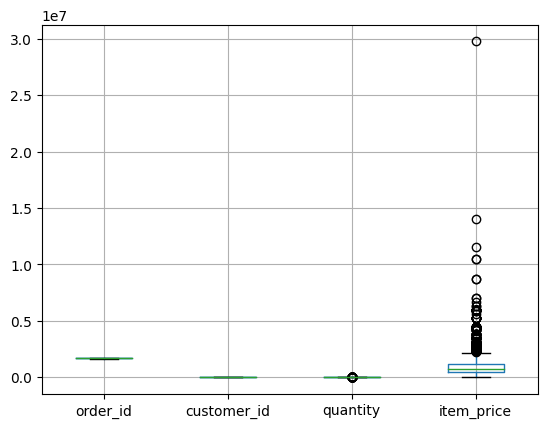

Final shape:  (4379, 9)


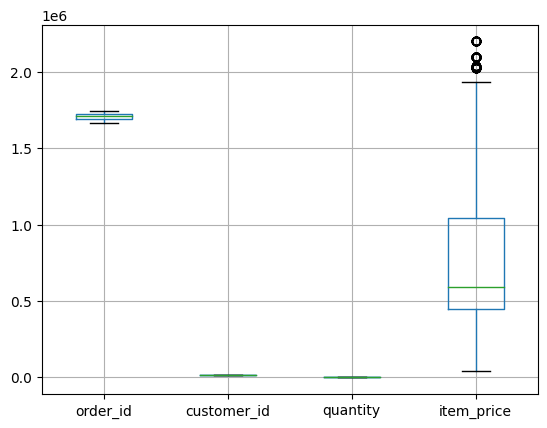

In [21]:
# Outliers Handling
# Q1, Q3, dan IQR
Q1 = retail_raw['item_price'].quantile(0.25)
Q3 = retail_raw['item_price'].quantile(0.75)
IQR = Q3 - Q1

# Shape of the dataset before its outliers were dropped
print('Initial shape: ', retail_raw.shape)

# Plot outlier in boxplot
import matplotlib.pyplot as plt
retail_raw.boxplot()
plt.show()

# Removing outliers
retail_raw = retail_raw[~((retail_raw['item_price'] < (Q1 - 1.5*IQR)) | (retail_raw['item_price'] > (Q3 + 1.5*IQR)))]

# Shape of the dataset after its outliers were dropped
print('Final shape: ', retail_raw.shape)

# Plot outlier in boxplot
import matplotlib.pyplot as plt
retail_raw.boxplot()
plt.show()

In [ ]:
# Duplicates Handling
# Check for duplicates
print(retail_raw.duplicated(subset=None))

# Shape of the dataset before its duplicates were dropped
print('Initial shape: ', retail_raw.shape)

# Drop all duplicates
retail_raw.drop_duplicates(inplace=True)

# Shape of the dataset after its duplicates were dropped
print('Final shape: ', retail_raw.shape)

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 4614, dtype: bool
Initial shape:  (4614, 9)
Final shape:  (4614, 9)


<ipython-input-15-62ce8acefd23>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_raw.drop_duplicates(inplace=True)
